In [ ]:
!pip install transformers

In [ ]:
!nvidia-smi

Mon Feb 26 06:29:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              51W / 400W |   8231MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--


Creating a function that takes an input of a string and outputs a list of people identified by the model.

Example Input: "John Smith and Mary walked to the beach."

Example Output: ["John Smith","Mary"]

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

In [ ]:
##start here
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
def Name_Recognizer(text):
    nlp = pipeline("ner", model=model, tokenizer=tokenizer)
    data = nlp(text)
    result = []

    current_entity = ""
    for item in data:
        if item['entity'] == 'B-PER':
            if current_entity:
                result.append(current_entity)
            current_entity = item['word']
        elif item['entity'] == 'I-PER':
            current_entity += ' ' + item['word']

    if current_entity:
        result.append(current_entity)

    return result

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_text = "John Smith and Mary Jane walked to the beach."
output = Name_Recognizer(input_text)
print(output)

['John Smith', 'Mary Jane']



Creating a token generation pipeline for the following model: https://huggingface.co/bigscience/bloom-7b1

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 16.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline

model_id = "bigscience/bloom-7b1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# Pipeline for text generation
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Prompt for text generation
prompt = "Once upon a time in"

# Generate text using the pipeline
generated_text = text_generator(prompt, max_length=50, num_return_sequences=1)

# Print the generated text
print("Generated Text:")
for sequence in generated_text:
    print(sequence['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Generated Text:
Once upon a time in the land of the free, there was a man named John.
He was a man of great wealth and great power.
He was also a man of great pride.
He was a man of great wealth and great power.
He


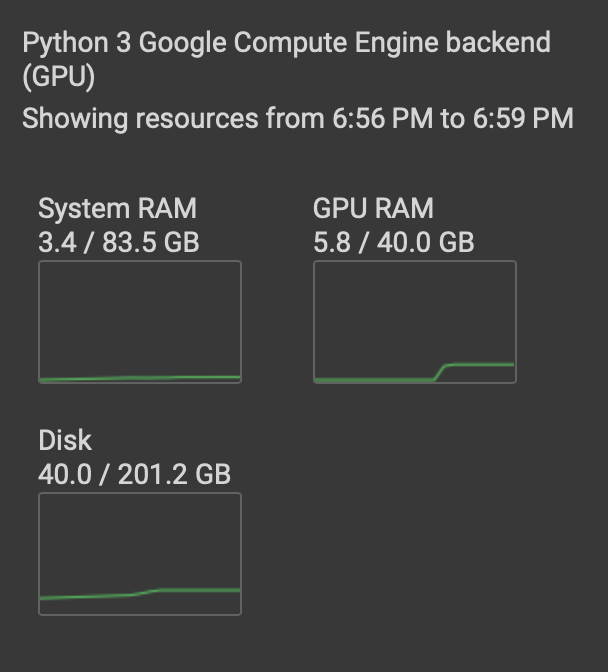

Creating a token generation pipeline for the following model: https://huggingface.co/EleutherAI/gpt-neox-20b

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline

model_id = "EleutherAI/gpt-neox-20b"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/457k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/60.4k [00:00<?, ?B/s]

model-00001-of-00046.safetensors:   0%|          | 0.00/926M [00:00<?, ?B/s]

model-00002-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00003-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00004-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00005-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00006-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00007-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00008-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00009-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00010-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00011-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00012-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00013-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00014-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00015-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00016-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00017-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00018-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00019-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00020-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00021-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00022-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00023-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00024-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00025-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00026-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00027-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00028-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00029-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00030-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00031-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00032-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00033-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00034-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00035-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00036-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00037-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00038-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00039-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00040-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00041-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00042-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00043-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00044-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00045-of-00046.safetensors:   0%|          | 0.00/604M [00:00<?, ?B/s]

model-00046-of-00046.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/46 [00:00<?, ?it/s]

In [ ]:

# Pipeline for text generation
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Prompt for text generation
prompt = "Once upon a time in"

# Generate text using the pipeline
generated_text = text_generator(prompt, max_length=50, num_return_sequences=1)

# Print the generated text
print("Generated Text:")
for sequence in generated_text:
    print(sequence['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Generated Text:
Once upon a time in a land far away, there lived a king who had a daughter. She was the most beautiful girl in the world. She was so beautiful that she was known by everyone in the kingdom.

One day, the king


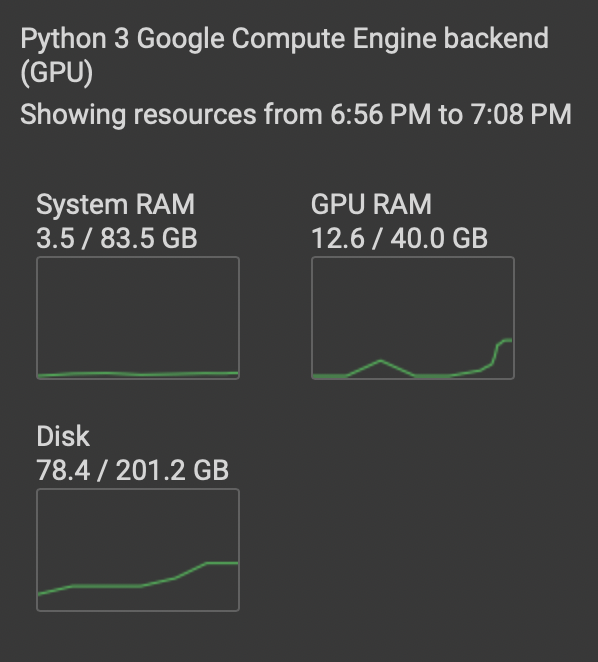

Creating a token generation pipeline for the following model: https://huggingface.co/google/flan-ul2

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from transformers import AutoTokenizer, BitsAndBytesConfig, pipeline, T5ForConditionalGeneration

model_id = "google/flan-ul2"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = T5ForConditionalGeneration.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model-00001-of-00008.bin:   0%|          | 0.00/4.69G [00:00<?, ?B/s]

pytorch_model-00002-of-00008.bin:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

pytorch_model-00003-of-00008.bin:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

pytorch_model-00004-of-00008.bin:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

pytorch_model-00005-of-00008.bin:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

pytorch_model-00006-of-00008.bin:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

pytorch_model-00007-of-00008.bin:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

pytorch_model-00008-of-00008.bin:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
import textwrap

# Simple generation function
def text_generator(input_string, max_length=50 ):
    inputs = tokenizer(input_string, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(inputs,
                             temperature = 0.7,
                            max_length=max_length)
    wrapped_text = textwrap.fill(tokenizer.decode(outputs[0]), width=100)
    return wrapped_text

In [ ]:
input_string = "Write me a story that starts with - Once upon a time in"

text_generator(input_string)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


'<pad> Once upon a time in a land far away lived a man named Jack. Jack was a very poor man.</s>'

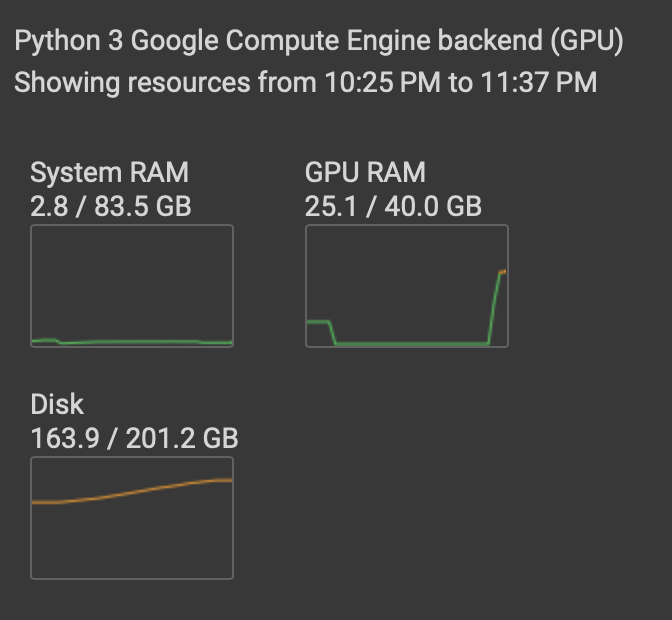

Creating a token generation pipeline for the following model: https://huggingface.co/cerebras/Cerebras-GPT-13B

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline

model_id = "cerebras/Cerebras-GPT-13B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/800 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/29.7G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/21.9G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# Pipeline for text generation
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Prompt for text generation
prompt = "Once upon a time in"

# Generate text using the pipeline
generated_text = text_generator(prompt, max_length=50, num_return_sequences=1)

# Print the generated text
print("Generated Text:")
for sequence in generated_text:
    print(sequence['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
Once upon a time in the not-so-distant past, I was a big fan of the original Star Wars trilogy. I was a huge fan of the original trilogy, and I was a huge fan of the prequels. I was


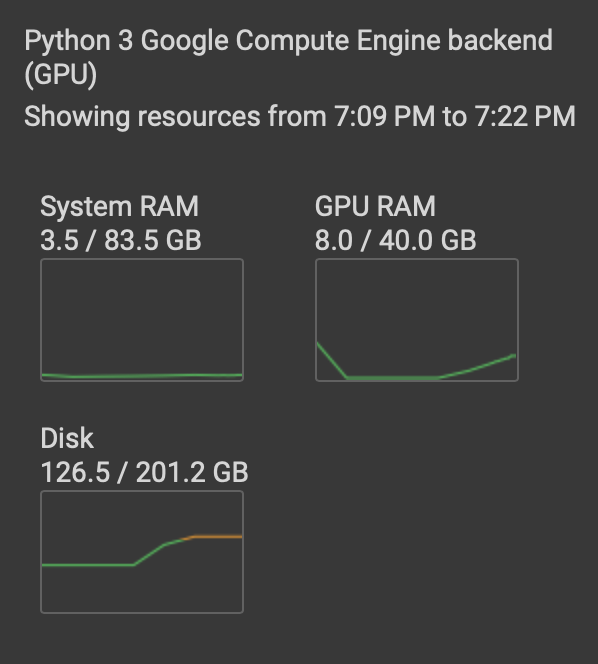

In the given notebook, the decision to employ 4-bit quantization for various models is for an optimal trade-off between efficiency and accuracy. Quantization involves converting the model's numerical precision from a higher (e.g., 32-bit floating point) to a lower precision, in this case, 4-bit integers.

The primary motivation behind choosing 4-bit quantization lies in its ability to significantly reduce memory usage and accelerate computations. By employing the lowest possible precision while still maintaining a reasonable level of accuracy, the model becomes well-suited for deployment on devices with limited memory resources, real-time applications, and specialized hardware accelerators. The choice of 4-bit quantization aligns with the objective of achieving these benefits while minimizing the impact on model performance.

